In [35]:
import glob    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
sns.set_theme()
sns.set(font_scale=0.8)

from solardatatools import DataHandler
from solardatatools.solar_noon import energy_com
from solardatatools.signal_decompositions import l2_l1d1_l2d2p365 as cvx_sd # sum_squares version
from solardatatools.signal_decompositions_l2norm import l2_l1d1_l2d2p365 as cvx_sd_l2norm
from solardatatools.algorithms.time_shifts import TimeShift

In [22]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2

## check which datasets have timeshifts
# get mote data

In [39]:
paths = ["./pvdaq/*.csv"]

pvdaq_data = {}
for path in paths:
    for fname in glob.glob(path):
        print(fname)
        df = pd.read_csv(fname)
        dh = DataHandler(df, convert_to_ts=False, datetime_col="Unnamed: 0")
        dh.run_pipeline(power_col=dh.keys[-1], fix_shifts=True) # ac_power, or should I take dc_power?
        power_data_matrix = dh.filled_data_matrix
        
        if dh.time_shifts:
            pvdaq_data[fname] = power_data_matrix

./pvdaq/pvdaq_1199_2015-2017.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

Fix time shift algorithm failed.
Error message: All-NaN slice encountered




Traceback (most recent call last):
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 426, in run_pipeline
    self.auto_fix_time_shifts(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 960, in auto_fix_time_shifts
    self.time_shift_analysis.run(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/algorithms/time_shifts.py", line 67, in run
    hn, rn, tv_metric, jpy, best_ix = self.optimize_c1(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/algorithms/time_shifts.py", line 194, in optimize_c1
    best_ix = subset_ixs[np.nanargmin(hn[subset_ixs])]
  File "<__array_function__ internals>", line 180, in nanargmin
  File "/Users/smiskov/opt/anaconda3/envs/pvi-env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py", line 553, in nanargmin
    raise ValueError("All-NaN slice encountered")
ValueError: All-NaN slice encoun

total time: 39.51 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              9.30s
Cleaning                   24.65s
Filtering/Summarizing      5.56s
    Data quality           0.35s
    Clear day detect       0.58s
    Clipping detect        0.18s
    Capacity change detect 4.44s



In [32]:
paths = ["./pvo/*.csv"]#, "./pvdaq/*.csv"]

pvo_data = {}
for path in paths:
    for fname in glob.glob(path):
        print(fname)
        df = pd.read_csv(fname)
        dh = DataHandler(df, convert_to_ts=False, datetime_col="Time")
        dh.run_pipeline(power_col=dh.keys[-1], fix_shifts=True)
        power_data_matrix = dh.filled_data_matrix
        
        if dh.time_shifts:
            pvo_data[fname] = power_data_matrix

./pvo/pvo_id_6035.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

total time: 64.07 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              17.21s
Cleaning                   28.34s
Filtering/Summarizing      18.52s
    Data quality           0.57s
    Clear day detect       2.66s
    Clipping detect        0.12s
    Capacity change detect 15.18s

./pvo/pvo_id_5503.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

total time: 77.77 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              15.77s
Cleaning                   42.39s
Filtering/Summarizing      19.61s
    Data quality           0.56s
    Clear day detect       2.00s
    Clipping detect        0.16s
    Capacity change detect 16.88s



./cassandra/TACHC1022158.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

3.1622776601683795 500.0
total time: 56.89 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              9.75s
Cleaning                   39.87s
Filtering/Summarizing      7.28s
    Data quality           0.36s
    Clear day detect       0.51s
    Clipping detect        0.20s
    Capacity change detect 6.21s

./cassandra/TACIC1066981.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

100.0 500.0
total time: 55.07 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              14.83s
Cleaning                   26.99s
Filtering/Summarizing      13.25s
    Data quality           0.50s
    Clear day detect       0.98s
    Clipping detect        0.18s
    Capacity change detect 11.60s

./cassandra/TADKC1095559.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

12.589254117941675 500.0
total time: 47.60 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.34s
Cleaning                   31.19s
Filtering/Summarizing      12.07s
    Data quality           0.41s
    Clear day detect       1.42s
    Clipping detect        0.12s
    Capacity change detect 10.13s

./cassandra/TADBC1077912.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

3.1622776601683795 500.0
total time: 53.78 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              13.77s
Cleaning                   30.29s
Filtering/Summarizing      9.73s
    Data quality           0.51s
    Clear day detect       1.17s
    Clipping detect        0.12s
    Capacity change detect 7.93s

./cassandra/TADKC1094999.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

12.589254117941675 500.0
total time: 52.69 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              5.51s
Cleaning                   38.91s
Filtering/Summarizing      8.28s
    Data quality           0.34s
    Clear day detect       0.87s
    Clipping detect        0.13s
    Capacity change detect 6.94s



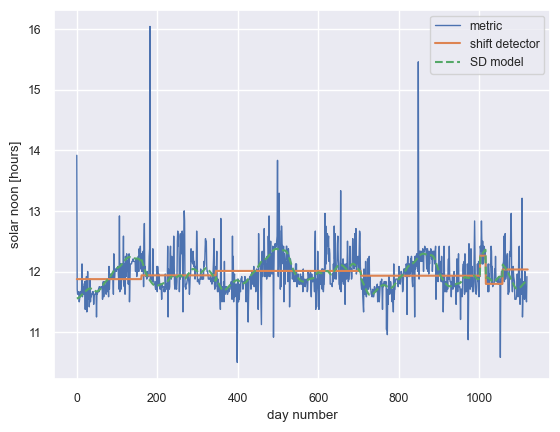

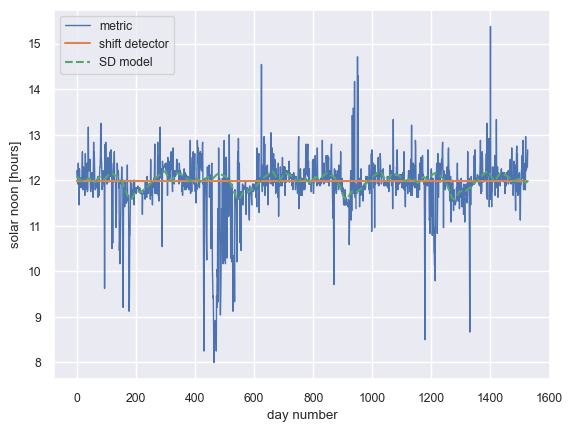

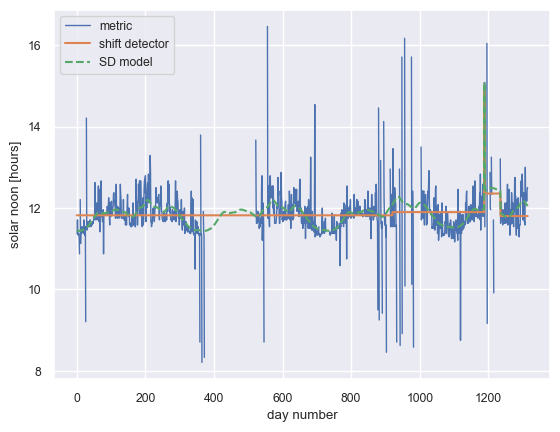

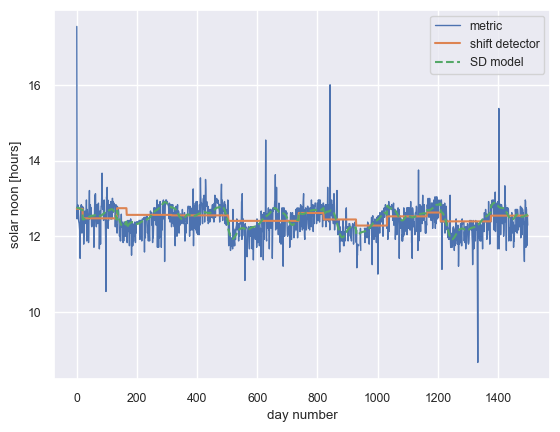

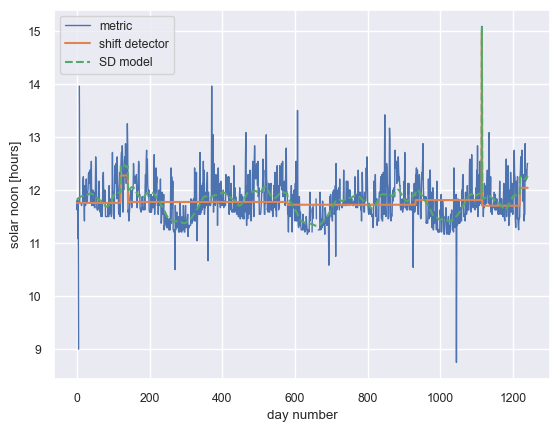

In [17]:
paths = ["./cassandra/*.csv"]

cassandra_data = {}
for path in paths:
    for fname in glob.glob(path):
        print(fname)
        df = pd.read_csv(fname)
        # data = df["meas_val_f"] # ac power
        dh = DataHandler(df, convert_to_ts=True)
        dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True)
        power_data_matrix = dh.filled_data_matrix
        
        if dh.time_shifts:
            cassandra_data[fname] = power_data_matrix

In [18]:
c1s_cassandra = [3.1622776601683795, 12.589254117941675, 3.1622776601683795, 12.589254117941675]

In [7]:
print(cassandra_data.keys())

dict_keys(['./cassandra/TACIC1066981.csv', './cassandra/TADKC1095559.csv', './cassandra/TADBC1077912.csv', './cassandra/TADKC1094999.csv'])


In [33]:
print(pvo_data.keys()) # no timeshifts in this data

dict_keys([])


In [40]:
print(pvdaq_data.keys())

dict_keys([])


# Need to add c1 optimization + iterative reweighting?
# check quality
# reweight
# check new weights

In [26]:
filled_mtx = {}

In [27]:
path = "./cassandra/*.csv"

for fname in glob.glob(path):
    print(fname)
    df = pd.read_csv(fname)
    dh = DataHandler(df, convert_to_ts=True)
    dh.run_pipeline(power_col=dh.keys[0][-1])
    filled_mtx[fname] = dh.filled_data_matrix
   

./cassandra/TACHC1022158.csv
total time: 12.43 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              6.85s
Cleaning                   0.37s
Filtering/Summarizing      5.21s
    Data quality           0.26s
    Clear day detect       0.37s
    Clipping detect        0.14s
    Capacity change detect 4.44s

./cassandra/TACIC1066981.csv
total time: 21.24 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              11.20s
Cleaning                   0.61s
Filtering/Summarizing      9.43s
    Data quality           0.36s
    Clear day detect       0.70s
    Clipping detect        0.12s
    Capacity change detect 8.25s

./cassandra/TADKC1095559.csv
total time: 12.62 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              3.06s
Cleaning                   0.37s
Filtering/Summarizing      9.19s
    Data quality           0.31s
    Clear 

./cassandra/TACHC1022158.csv
./cassandra/TACIC1066981.csv
./cassandra/TADKC1095559.csv
./cassandra/TADBC1077912.csv
./cassandra/TADKC1094999.csv


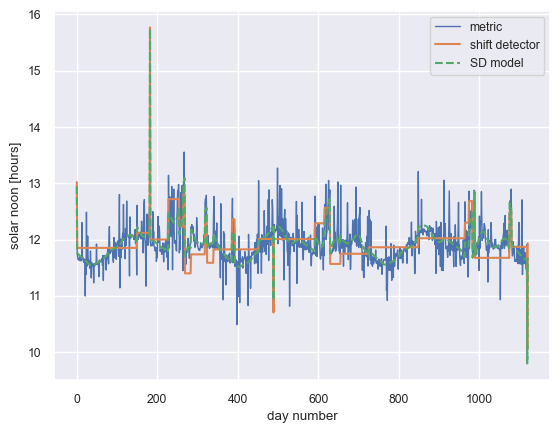

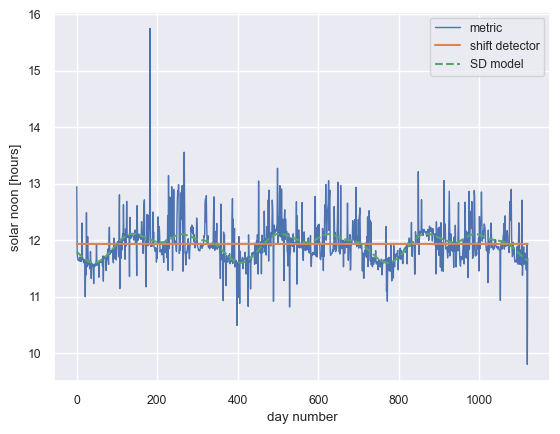

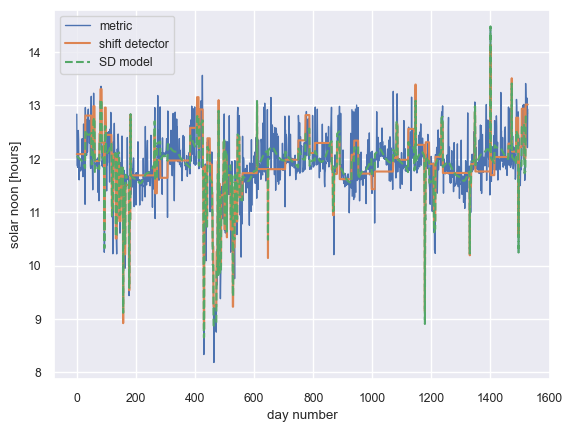

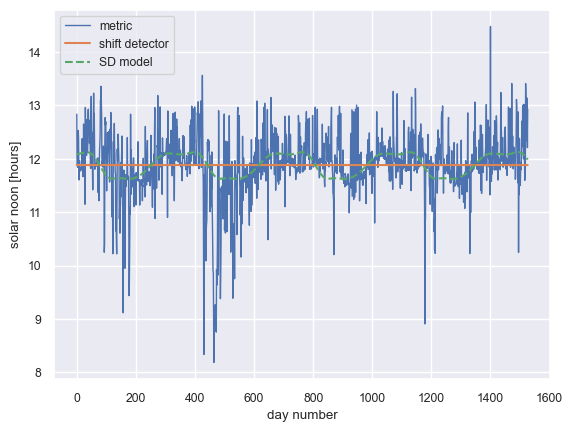

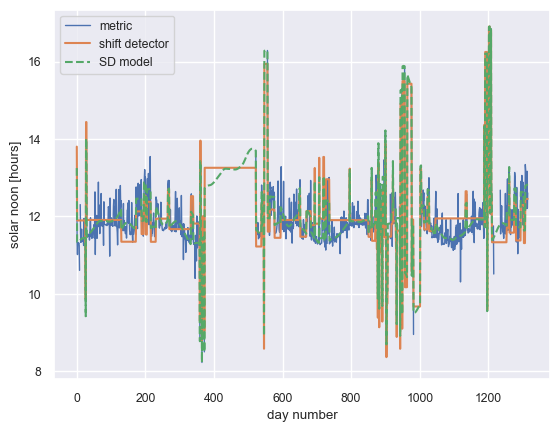

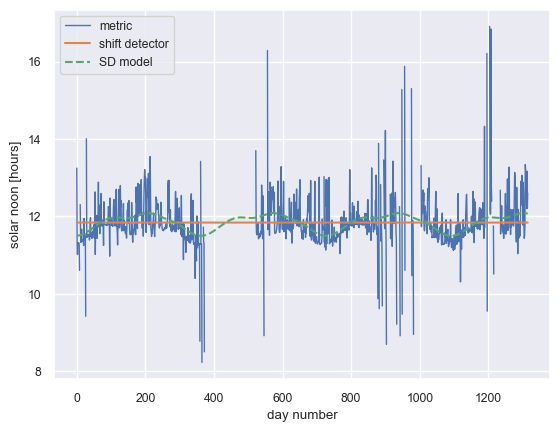

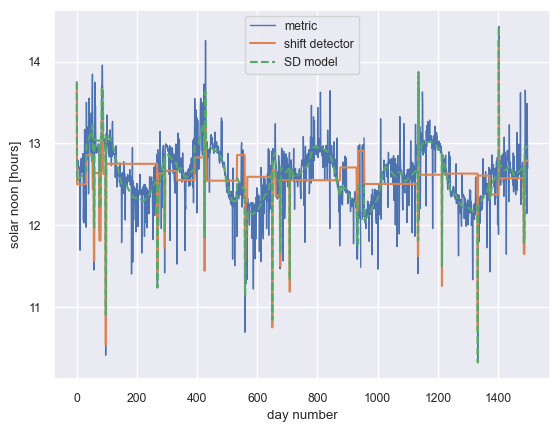

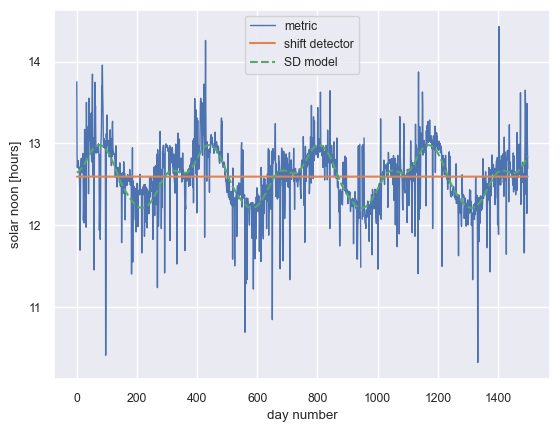

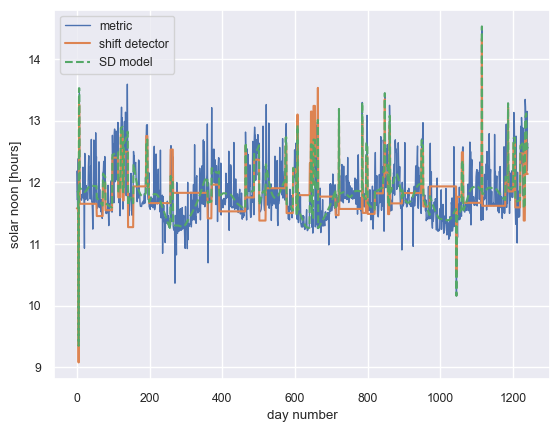

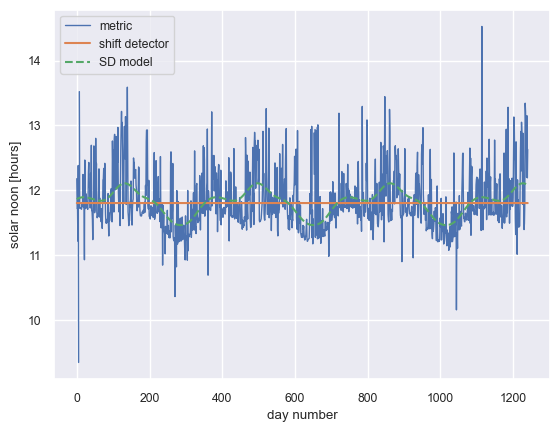

In [39]:
for fname in glob.glob(path):
    print(fname)
    filled_data_matrix = filled_mtx[fname]

    time_shift_analysis = TimeShift()
    time_shift_analysis.l2norm = False
    time_shift_analysis.run(
        filled_data_matrix,
        #use_ixs=use_ixs,
        c1=5,
        c2=500,
        solar_noon_estimator="com",
        threshold=0.1,
        periodic_detector=False,
        solver="MOSEK",
    )
    #self.filled_data_matrix = self.time_shift_analysis.corrected_data
    time_shift_analysis.plot_analysis()

    time_shift_analysis_l2 = TimeShift()
    time_shift_analysis_l2.l2norm = True
    time_shift_analysis_l2.run(
        filled_data_matrix,
        #use_ixs=use_ixs,
        c1=5,
        c2=500,
        solar_noon_estimator="com",
        threshold=0.1,
        periodic_detector=False,
        solver="MOSEK"
    )
    time_shift_analysis_l2.plot_analysis()

In [37]:
results = {}

In [44]:
weight_iter = np.logspace(1, 4, 100)

def run(sig):
    mae_list = []
    
    filled_data_matrix = sig
    
    time_shift_analysis_l2 = TimeShift()
    time_shift_analysis_l2.l2norm = True
    time_shift_analysis_l2.run(
        filled_data_matrix,
        #use_ixs=use_ixs,
        c1=5,
        c2=500,
        solar_noon_estimator="com",
        threshold=0.1,
        periodic_detector=False,
        solver="MOSEK"
    )
    for w in tqdm(weight_iter):
        time_shift_analysis = TimeShift()
        time_shift_analysis.l2norm = False
        time_shift_analysis.run(
            filled_data_matrix,
            #use_ixs=use_ixs,
            c1=5,
            c2=w,
            solar_noon_estimator="com",
            threshold=0.1,
            periodic_detector=False,
            solver="MOSEK",
        )

        mae_list.append(mae(time_shift_analysis.s1, time_shift_analysis_l2.s1))
        
    return weight_iter[np.argmin(mae_list)], np.min(mae_list), mae_list

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:20<00:00,  1.24it/s]


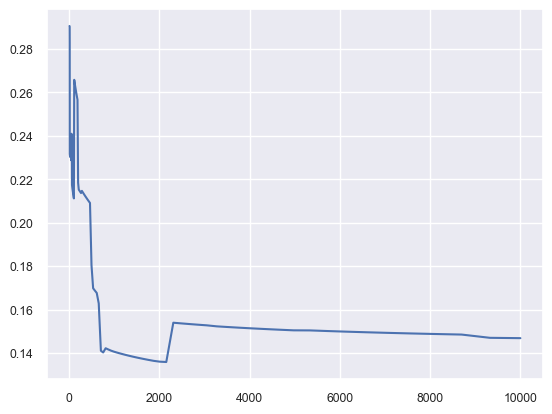

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:46<00:00,  1.07s/it]


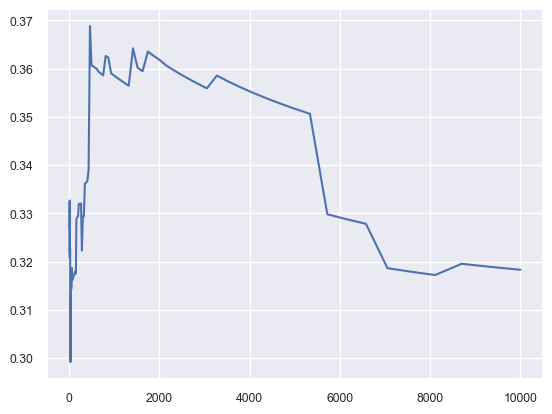

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:18<00:00,  1.27it/s]


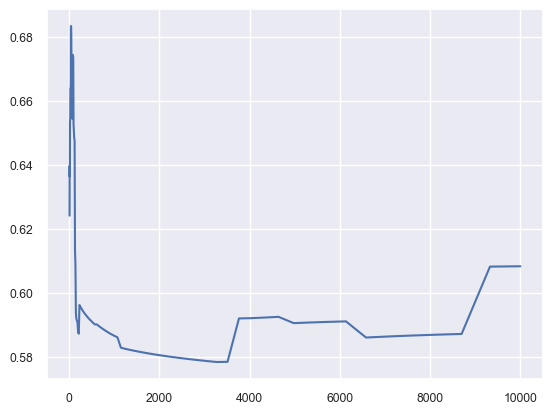

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:25<00:00,  1.17it/s]


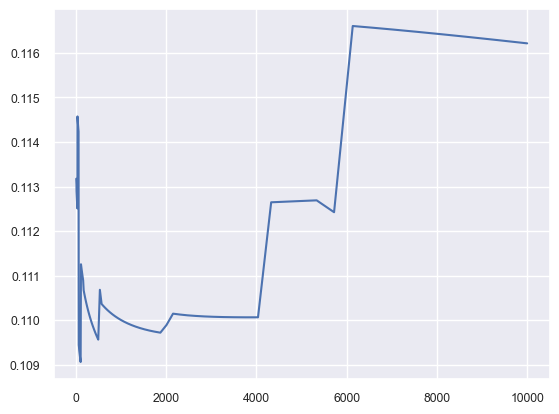

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:16<00:00,  1.30it/s]


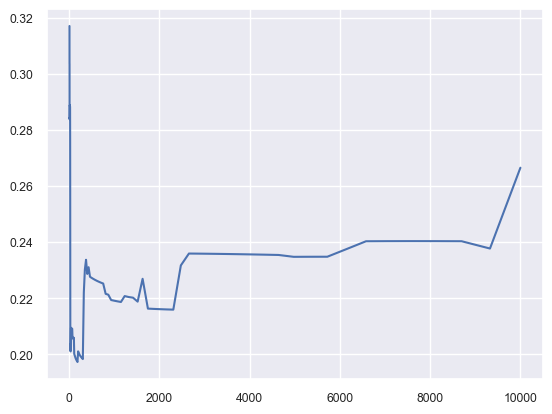

In [45]:
for fname in glob.glob(path):
    r = run(filled_mtx[fname])
    results[f"{fname}_weight_min"] =  r[0]
    results[f"{fname}_mae_min"] = r[1]
    results[f"{fname}_mae_list"] = r[2]
    plt.plot(weight_iter, results[f"{fname}_mae_list"])
    plt.show()

./cassandra/TACHC1022158.csv


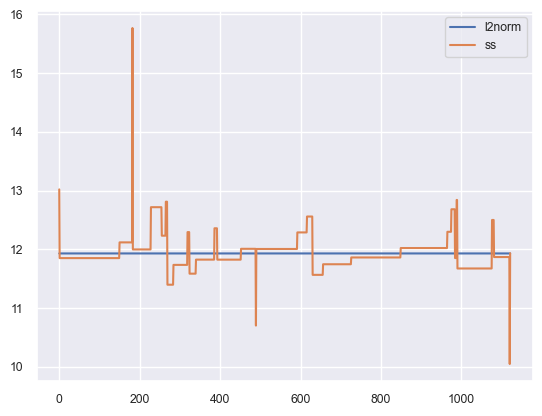

./cassandra/TACIC1066981.csv


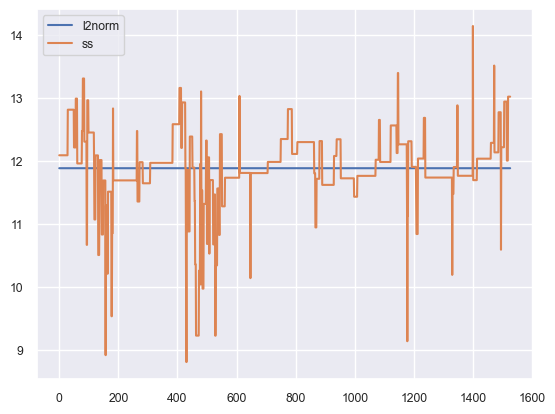

./cassandra/TADKC1095559.csv


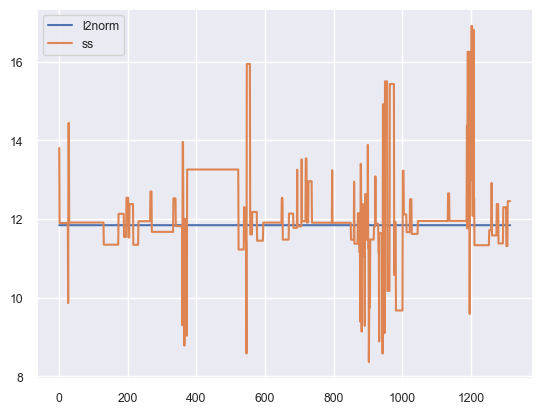

./cassandra/TADBC1077912.csv


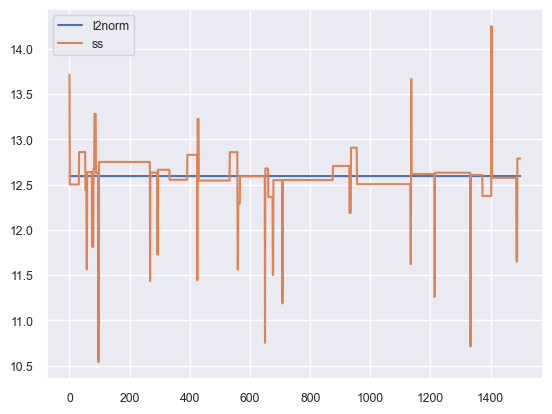

./cassandra/TADKC1094999.csv


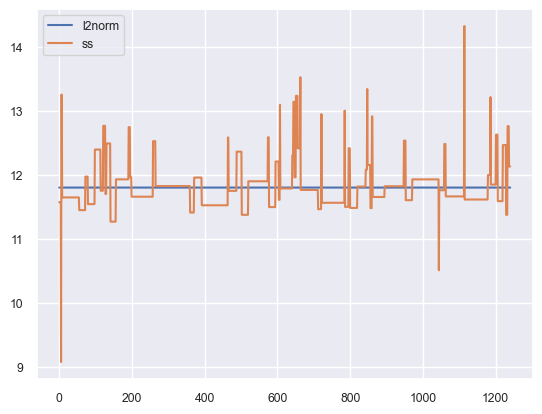

In [49]:
for fname in glob.glob(path):
    print(fname)
    filled_data_matrix = filled_mtx[fname]

    time_shift_analysis = TimeShift()
    time_shift_analysis.l2norm = False
    time_shift_analysis.run(
        filled_data_matrix,
        #use_ixs=use_ixs,
        c1=5, #results[f"{fname}_weight_min"],
        c2=500,
        solar_noon_estimator="com",
        threshold=0.1,
        periodic_detector=False,
        solver="MOSEK",
    )
    #self.filled_data_matrix = self.time_shift_analysis.corrected_data
    #time_shift_analysis.plot_analysis()

    time_shift_analysis_l2 = TimeShift()
    time_shift_analysis_l2.l2norm = True
    time_shift_analysis_l2.run(
        filled_data_matrix,
        #use_ixs=use_ixs,
        c1=5,
        c2=500,
        solar_noon_estimator="com",
        threshold=0.1,
        periodic_detector=False,
        solver="MOSEK"
    )
    #time_shift_analysis_l2.plot_analysis()
    
    fig = plt.figure()
    plt.plot(time_shift_analysis_l2.s1, label="l2norm")
    plt.plot(time_shift_analysis.s1, label="ss")
    plt.legend()
    plt.show()

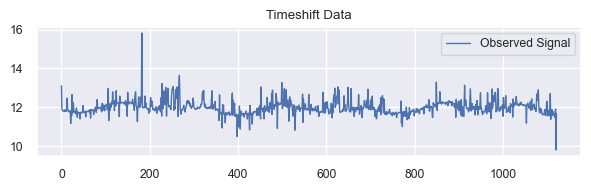

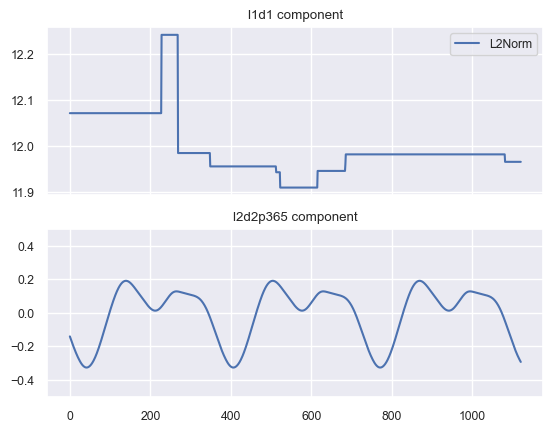

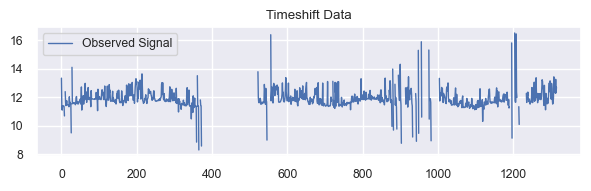

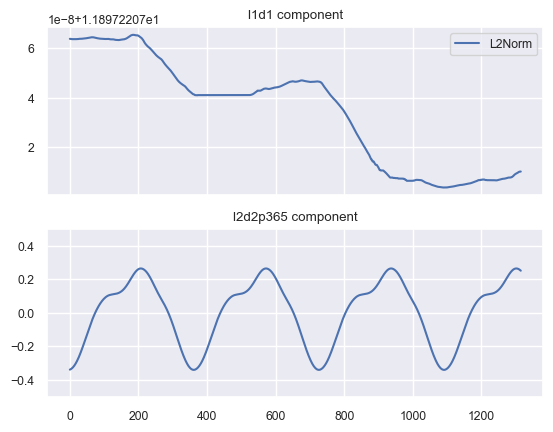

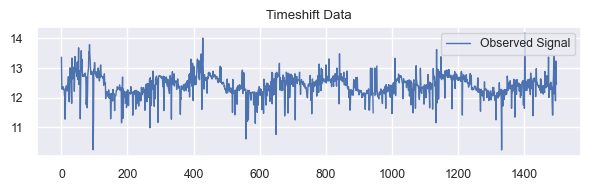

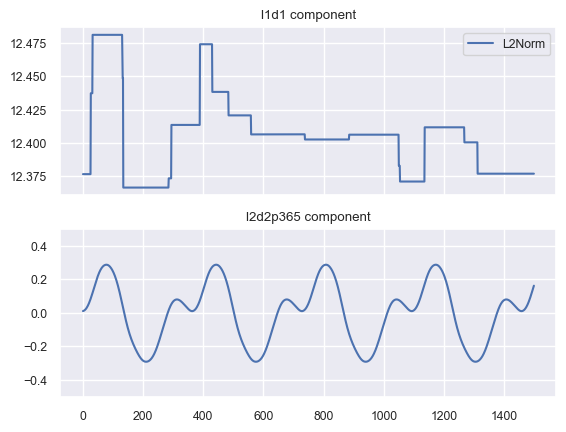

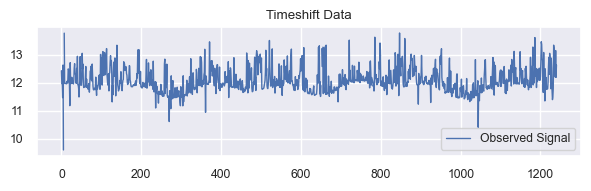

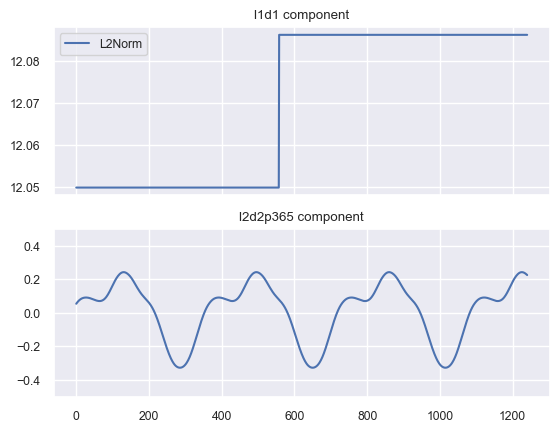

In [19]:
for m, c1 in zip(cassandra_data.values(), c1s_cassandra):
    # Estimate solar noon
    metric = energy_com(m)   # does not depend on any SDs
    use_ixs =  ~np.isnan(metric)

    # plot observed
    f, ax = plt.subplots(1, 1, figsize=(6,2))
    ax.plot(metric, linewidth=1, label="Observed Signal");
    ax.set_title("Timeshift Data")
    plt.tight_layout()
    ax.legend()
    plt.show()
    
#    cvx_ss = cvx_sd(metric, c1=6, c2=5e5, use_ixs=use_ixs, solver="MOSEK")

    # approximate c1 weight from optimization  in module (c2 is fixed)
    cvx_l2n = cvx_sd_l2norm(metric, c1=c1, c2=500, use_ixs=use_ixs, solver="MOSEK")

    # print(f'MAE s_hat  (OSD,CVX)   {mae(cvx_ss[0], cvx_l2n[0]):.2e}')
    # print(f'MAE s_seas (OSD,CVX)   {mae(cvx_ss[1], cvx_l2n[1]):.2e}')

    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    #ax1.plot(cvx_ss[0], label="SumSquares")
    ax1.plot(cvx_l2n[0], label="L2Norm")
    #ax1.plot(metric, alpha=0.2)
    ax1.set_title("l1d1 component")
    #ax2.plot(cvx_ss[1])
    ax2.plot(cvx_l2n[1])
    ax2.plot(metric, alpha=0.2)
    ax2.set_ylim(-0.5, 0.5)
    ax2.set_title("l2d2p365 component")
    ax1.legend()
    plt.show()

In [ ]:
filled_data_matrix

In [ ]:
paths = ["./cassandra/*.csv"]#, "./pvo/*.csv", "./pvdaq/*.csv"]

cassandra_data = {}
for path in paths:
    for fname in glob.glob(path):
        print(fname)
        df = pd.read_csv(fname)
        # data = df["meas_val_f"] # ac power
        dh = DataHandler(df, convert_to_ts=True)
        dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True)
        power_data_matrix = dh.filled_data_matrix
        
        if dh.time_shifts:
            cassandra_data[fname] = power_data_matrix